# Machine Learning - Exercise 3
**George Touros** - *2022201804023*

In [24]:
import wget
import csv
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
pd.set_option("display.precision",4)
import warnings; warnings.simplefilter('ignore')
pd.options.display.max_rows = 4000
pd.options.display.max_columns = None
pd.options.display.precision = 4

## Index
*This is an index that will help quick navigation in this notebook*

   * [Loading the data](#1-01)
   * [Defining the problem](#1-02)
   * [Understanding the Data-Set](#1-03)
   * [Preparing the Data](#1-04)
   * [Selecting the features - dimensionality reduction](#1-05)
   * [Comparing Algorithms & Selection](#1-06)
   * [Algorithm Fine-Tuning](#1-07)
   * [Finalising the Model](#1-08)

<a id="1-01"></a> 
## Loading the data

In [25]:
def fetch_data(web_file, local_dir='.'):
    """Download the `web_file`, assuming it is a web resource into the local_dir. 
    If a file with the same filename already exists in the local directory, do not 
    download it but return its path instead.
    Arguments:
        web_file: a web resource identifiable by a url (str)
        local_dir: a local directory to download the web_file into (str)
    Return: The local path to the file (str)
    """
    file_name = local_dir + "/" + web_file.rsplit("/",1)[-1]
    if os.path.exists(file_name):
        return file_name
    else:
        file_name = wget.download(web_file, out=local_dir)
        return file_name
        
data_filename = fetch_data('https://raw.githubusercontent.com/MSc-in-Data-Science/class_material/master/semester_1/Machine_Learning/datasets/digit_recognizer_dataset.csv') or 'digit_recognizer_dataset.csv'

In [26]:
data = pd.read_csv('digit_recognizer_dataset.csv')

<a id="1-02"></a> 
## Defining the problem

We have been given the MNIST dataset of handwritten images of hand-drawn digits. 

Our task is to create a classification algorithm that will correctly predict the digit depicted in the image. 

<a id="1-03"></a> 
## Understanding the Dataset

In [27]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [28]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [29]:
data.shape

(42000, 785)

In [30]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54   

We have confirmed the attributes of the dataset described in the assignment:
   * The dataset contains 42000 images
   * The images have been decomposed to their pixels. Each image is a square of dimensions 28\*28 and each pixel has a single pixel value integer associated with it, demonstrating the light density of that pixel. This gives us 784 columns of integers plus one more integer column for the labels. 

In [31]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [32]:
print('The maximum value in the dataframe is: ' + str(data.max().max()))

The maximum value in the dataframe is: 255


In [33]:
print('The minimum value in the dataframe is: ' + str(data.min().min()))

The minimum value in the dataframe is: 0


In [34]:
print('The mean value in the dataframe is: ' + str(round(data.mean().mean(),3)))

The mean value in the dataframe is: 33.372


In [35]:
print('The number of columns with only zero values is: ' + str(data.loc[:,data.mean()==0].count().count()))

The number of columns with only zero values is: 76


We notice that the data is sparse. There are 76 pixels that only have a zero value in all images. This, combined with the fact that the mean value across the dataframe is only 33.3, indicates that out of the 784 features, we will probably need to do some dimensionality reduction, without losing much information. 

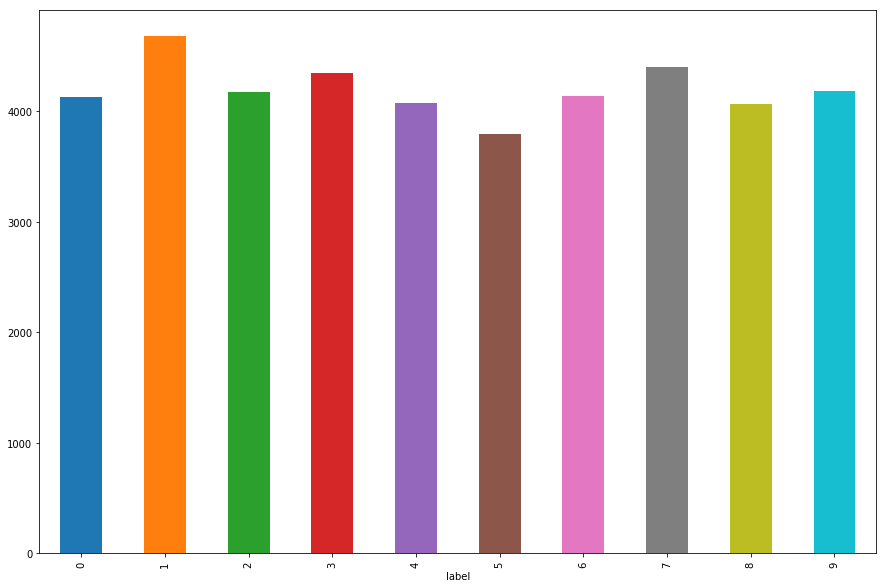

In [36]:
plt.subplots(figsize=(15,10))
data.groupby('label').size().plot(kind = 'bar')

There seems to be a fairly balanced class distribution. This will allow us to continue without the need for resampling any class. 

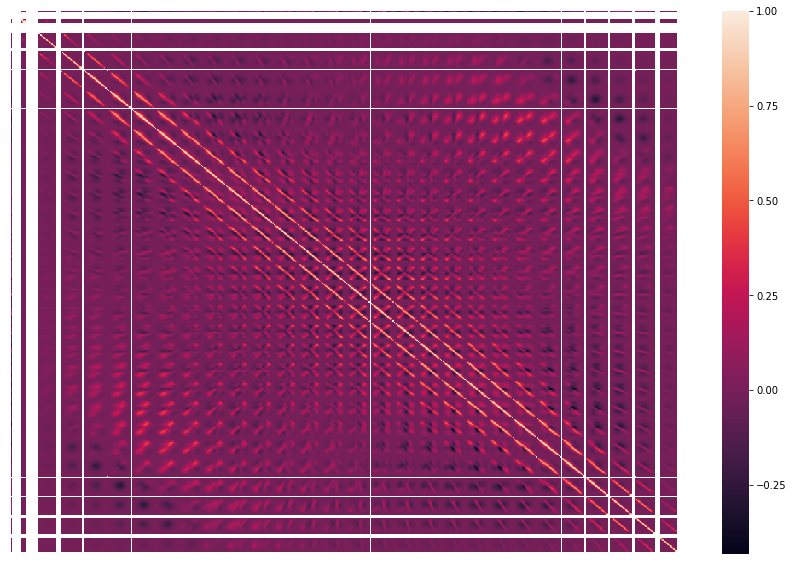

In [37]:
# Calculate correlations
corr = data.corr(method='pearson')
 
# Heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels = False, yticklabels = False)

In [38]:
corr_a = corr.abs()
s = corr_a.unstack().sort_values(kind="quicksort")
pairs = set(s[s>0.7].index)
clean_pairs=set([tuple(sorted(i)) for i in pairs if i[0]!=i[1]])
print('There are ' + str(len(clean_pairs)) + ' pairs with at least 70% correlation.')

There are 909 pairs with at least 70% correlation.


There also seems to be high correlation (more than 70% in absolute value) for at least 909 pairs of pixels. This might prove to be problematic, unless we do some sort of feature selection later on. 

<a id="1-04"></a> 
## Preparing the data

First we will remove all features that contain no information.

In [39]:
data_i = data.loc[:,data.mean()!=0]

Then, we will separate the X from the Y in our data

In [40]:
Y = data[['label']]
X = data_i.iloc[:,1:]

Before we move on, we will split the dataset into a train and a test dataset, so that we can train the scaler and the PCA on the same set as we will train the classification algorithm later on. 

In [41]:
test_size = 0.25
seed = 2015
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

As we will be performing PCA later on, it is imperative that we standardise the data first.

In [42]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X)
rescaledX_train = scaler.transform(X_train)
rescaledX_test = scaler.transform(X_test)

As the scaler returns a Numpy array, we will convert it back to dataframe, for our convenience. 

In [43]:
rescaledX_train = pd.DataFrame(rescaledX_train, columns=X.columns)
rescaledX_test = pd.DataFrame(rescaledX_test, columns=X.columns)

This is how our rescaled data looks like: 

In [44]:
rescaledX_train.head()

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel500,pi

In [45]:
rescaledX_train.shape, rescaledX_test.shape

((31500, 708), (10500, 708))

<a id="1-05"></a> 
## Selecting the features - dimensionality reduction 

In the previous step we already got rid of some features that didn't provide any information. We now have 708 features available. 

We will perform PCA to further decrease the dimensionality. 

First we will run the class with its default values, to have a benchmark. 

In [46]:
pca = PCA(copy = True)
fit = pca.fit(rescaledX_train)

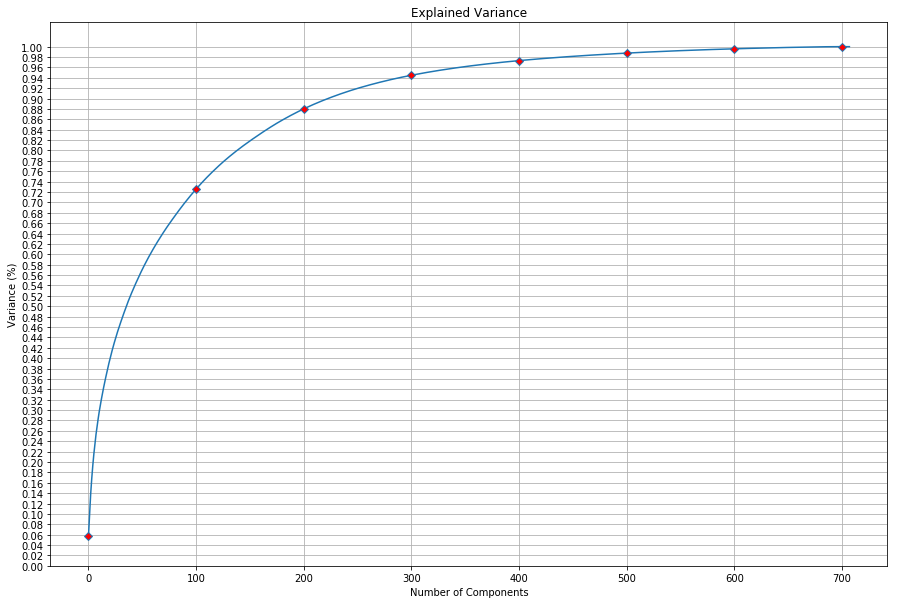

Wall time: 320 ms


In [47]:
%%time
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(fit.explained_variance_ratio_), marker = 'D', markerfacecolor='red', markevery=100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.yticks(np.arange(0.00,1.02,0.02))
plt.grid()
plt.show()

We notice that we can reach 98% of the explained variance by setting the number of components to 450. Before we settle with this number, we will also try the scikit built-in optimiser, by choosing the n_components == 'mle' and svd_solver == 'full', which according to the scikit documentation uses the method of Minka, T. P. “Automatic choice of dimensionality for PCA”. In NIPS, pp. 598-604.

We have tried to run it with various sizes of train sets, but it keeps raising a *Value Error: Math domain error* unless we feed it the whole rescaledX. As it will be demonstrated below, the dimensionality reduction performed is so small, that we will opt for our initial intuition anyway.

The Math domain error raised seems to be a known issue with the sklearn PCA class, and you can find out more about it [here](https://github.com/scikit-learn/scikit-learn/issues/10217) (the official scikit GitHub bug page).

Please be aware that the following cell will take quite a lot of time to run, if you want to repeat the execution. 

The number of components chosen was: 707


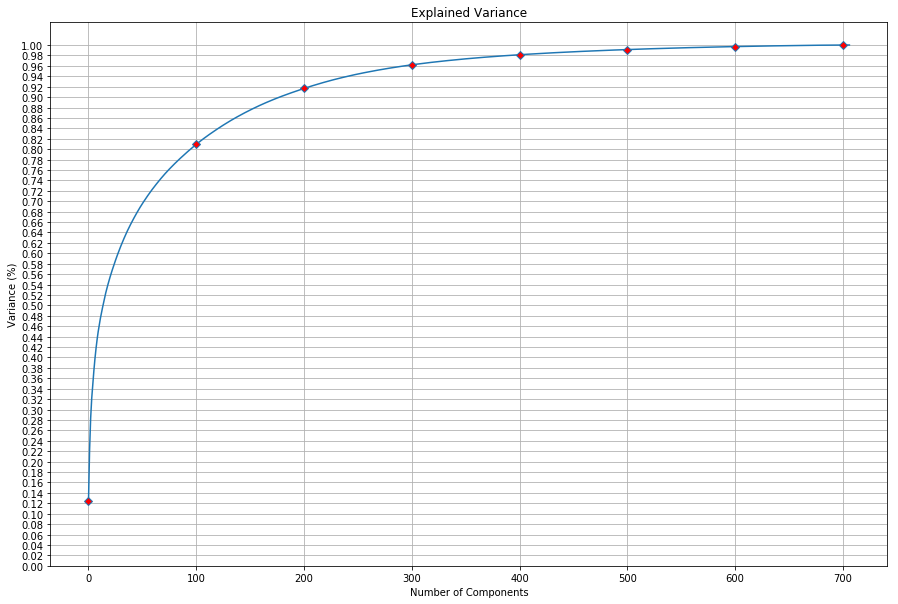

Wall time: 1min 47s


In [48]:
%%time
# feature extraction with the built-in optimiser
pca = PCA(n_components='mle', svd_solver='full', copy=True)
fit2 = pca.fit(rescaledX)
print('The number of components chosen was: %s' % fit2.n_components_)
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(fit2.explained_variance_ratio_), marker = 'D', markerfacecolor='red', markevery=100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.yticks(np.arange(0.00,1.02,0.02))
plt.grid()
plt.show()

At this point we have to make a choice. In order to make the model lighter and easier to run, we opt for the least number of components that we can keep without losing too much information. The reduction proposed by the optimiser is so small, it's almost negligible. 

Therefore we go for 450 components, and rerun the class.

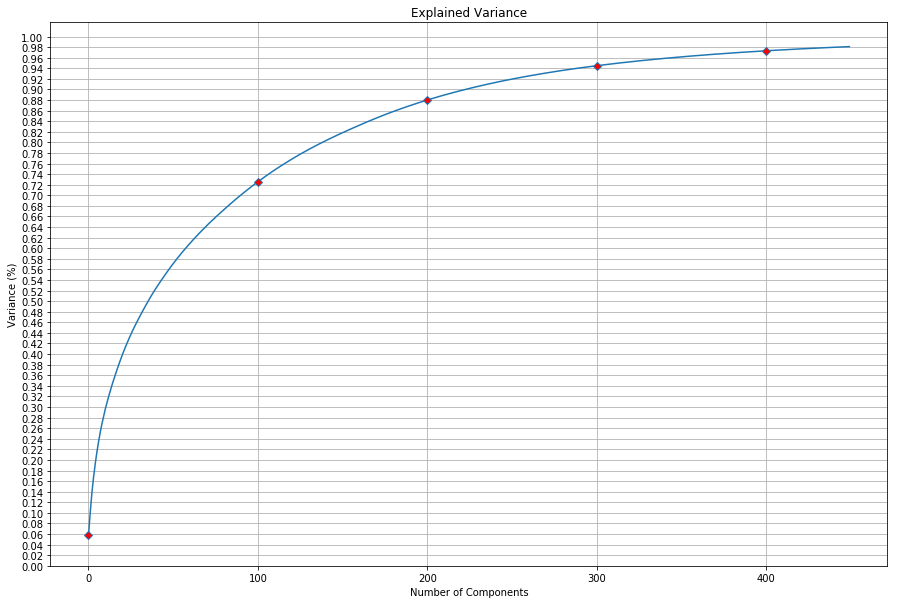

Wall time: 5.96 s


In [49]:
%%time
pca = PCA(n_components=450, copy=True)
#fit the PCA model in the train data
fit = pca.fit(rescaledX_train)
#transform train data
X_train_red = fit.transform(rescaledX_train)
#transform test data
X_test_red = fit.transform(rescaledX_test)

plt.figure(figsize=(15,10))
plt.plot(np.cumsum(fit.explained_variance_ratio_), marker = 'D', markerfacecolor='red', markevery=100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.yticks(np.arange(0.00,1.02,0.02))
plt.grid()
plt.show()

<a id="1-06"></a>
## Comparing Algorithms & Selection

We will try the following algorithms for classification: 
   * Decision Tree
   * Logistic Regression
   * KNN
   * SVM
   * Random Forest
   * Bagged Trees
   * AdABoost
   * XGBoost

For all of the above, we will choose **evaluation metrics**. Since this is a multiclass classification problem, area under the curve will not work. We will therefore keep track of Accuracy, Precision and Recall for all of the above algorithms. 

Remember! 

-> How many did I get correct?
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$ 
-> How many of the points I chose were relevant?
$$Precision = \frac{TP}{TP + FP}$$  
-> How many relevant points did I choose?
$$Recall = \frac{TP}{TP + FN}$$  

To better keep track of our Recall and Precision scores, we will instead measure the F1 score: 
$$F_1 = 2\frac{PR}{P+R}$$

Because we have a multi-class classification problem, we will be measuring the **macro average** for all the above metrics. This will calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account, which is not a problem in our case.


Our approach on the evaluation of each algorithm will be a train-test split, with the training set being the 75% of the data. The data-set is already split in the previous set, for the PCA execution. 

We shall test all of the aforementioned models and see how they score in (mostly) their default settings. We will then choose the best one and tweak it's hyperparameters to get the best algorithm.

In [50]:
#we choose a common seed for all algorithms
seed = 2015
#we choose a common number of trees for ensembles
num_trees = 100

models = []
models.append(('Decision Tree',  DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state = seed)))
models.append(('Logistic Regression',  LogisticRegression(random_state = seed)))
models.append(('kNN', neighbors.KNeighborsClassifier(n_neighbors = 3, weights='uniform', n_jobs=-1)))
models.append(('SVM', svm.SVC(kernel='rbf', C=1,gamma='auto',cache_size = 12288)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=num_trees, max_depth=10,n_jobs=-1,random_state=seed)))
models.append(('Bagged Trees', BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state = seed), 
                                                 n_estimators=num_trees, random_state=seed, n_jobs=-1)))
models.append(('AdaBoost',AdaBoostClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('XGBoost',XGBClassifier(nthread=8)))

In [51]:
%%time
results = []
names   = []
for name, model in models:
    #fit the model
    model.fit(X_train_red,Y_train)
    predicted = model.predict(X_train_red)
    
    #gather metrics
    accuracy = model.score(X_train_red,Y_train)
    precision= precision_score(Y_train, predicted, average = 'macro')
    recall = recall_score(Y_train, predicted, average = 'macro')
    f1 = f1_score(Y_train, predicted, average = 'macro')
    sc_results = [accuracy,precision,recall,f1]
    results.append(sc_results)
    names.append(name)
    print("%03s: Accuracy: %0.2f Precision: %0.2f Recall: %0.2f F_1 score: %0.2f" 
          % (name, accuracy, precision, recall, f1))

Decision Tree: Accuracy: 0.89 Precision: 0.89 Recall: 0.88 F_1 score: 0.88
Logistic Regression: Accuracy: 0.93 Precision: 0.93 Recall: 0.93 F_1 score: 0.93
kNN: Accuracy: 0.97 Precision: 0.97 Recall: 0.97 F_1 score: 0.97
SVM: Accuracy: 0.99 Precision: 0.99 Recall: 0.99 F_1 score: 0.99
Random Forest: Accuracy: 0.96 Precision: 0.96 Recall: 0.96 F_1 score: 0.96
Bagged Trees: Accuracy: 0.95 Precision: 0.95 Recall: 0.95 F_1 score: 0.95
AdaBoost: Accuracy: 0.75 Precision: 0.75 Recall: 0.74 F_1 score: 0.74
XGBoost: Accuracy: 0.93 Precision: 0.93 Recall: 0.93 F_1 score: 0.93
Wall time: 47min 3s


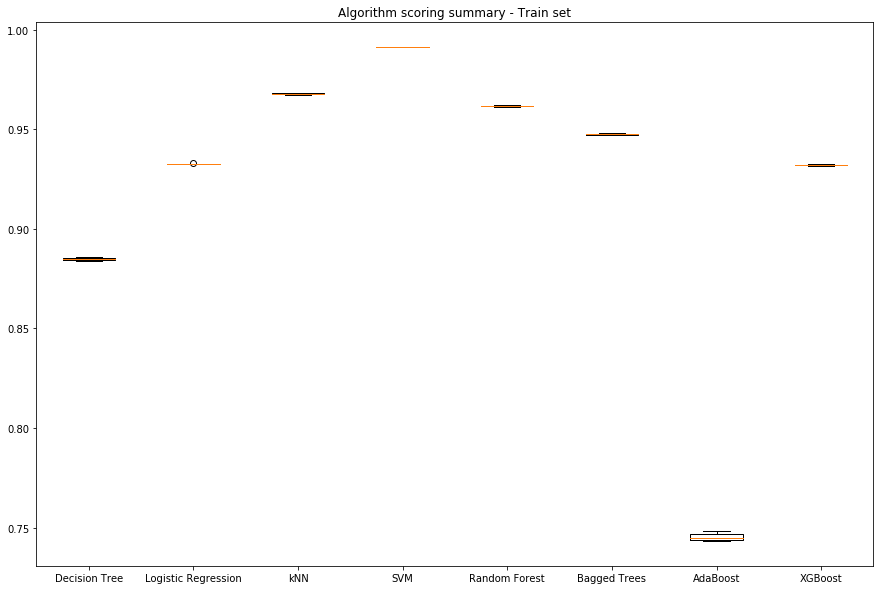

In [52]:
plt.figure(figsize=(15,10))
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.title('Algorithm scoring summary - Train set')
plt.show()

SVM is the clear winner on the training set. We will now perform the analysis on the test set to check for robustness.

In [53]:
%%time
results = []
names   = []
for name, model in models:
    #fit the model
    model.fit(X_train_red,Y_train)
    predicted = model.predict(X_test_red)
    
    #gather metrics
    accuracy = model.score(X_test_red,Y_test)
    precision= precision_score(Y_test, predicted, average = 'macro')
    recall = recall_score(Y_test, predicted, average = 'macro')
    f1 = f1_score(Y_test, predicted, average = 'macro')
    sc_results = [accuracy,precision,recall,f1]
    results.append(sc_results)
    names.append(name)
    print("%03s: Accuracy: %0.2f Precision: %0.2f Recall: %0.2f F_1 score: %0.2f" 
          % (name, accuracy, precision, recall, f1))

Decision Tree: Accuracy: 0.80 Precision: 0.80 Recall: 0.80 F_1 score: 0.80
Logistic Regression: Accuracy: 0.91 Precision: 0.91 Recall: 0.91 F_1 score: 0.91
kNN: Accuracy: 0.94 Precision: 0.94 Recall: 0.94 F_1 score: 0.94
SVM: Accuracy: 0.95 Precision: 0.96 Recall: 0.95 F_1 score: 0.95
Random Forest: Accuracy: 0.90 Precision: 0.90 Recall: 0.90 F_1 score: 0.90
Bagged Trees: Accuracy: 0.88 Precision: 0.88 Recall: 0.88 F_1 score: 0.88
AdaBoost: Accuracy: 0.74 Precision: 0.75 Recall: 0.74 F_1 score: 0.74
XGBoost: Accuracy: 0.91 Precision: 0.90 Recall: 0.90 F_1 score: 0.90
Wall time: 37min 52s


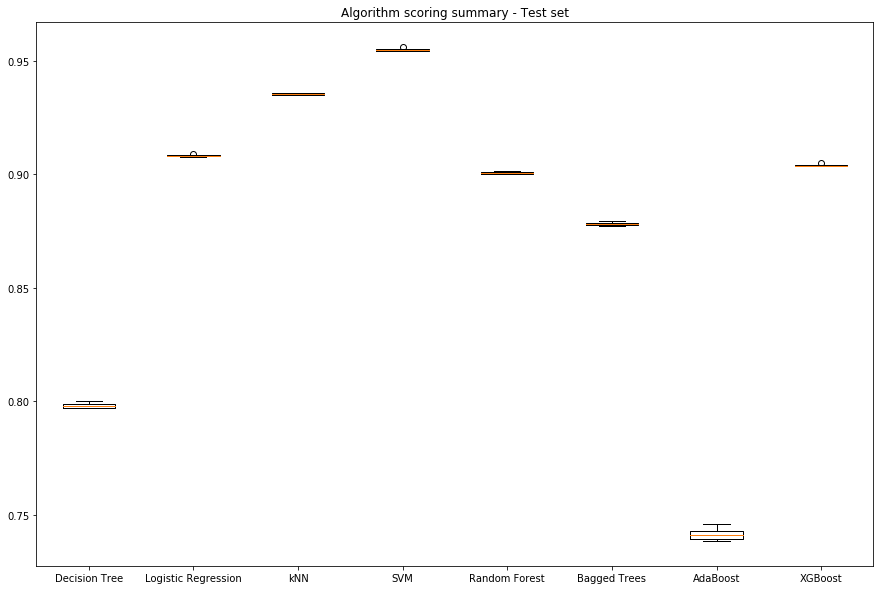

In [54]:
plt.figure(figsize=(15,10))
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.title('Algorithm scoring summary - Test set')
plt.show()

SVM is the clear winner again. The algorithm behaved in the same manner in both train and test sets. 

<a id="1-07"></a> 
## Algorithm Fine-Tuning 

Now that we have a clear winner, we shall experiment with the hyperparameters, in order to optimise the model.

We shall take the following approach:

   * Maintain our original Train - Test Split
   * Use GridSearchCV with a 3-fold cross-validation to get the best possible parameters on the train set
   * After we find the optimal hyperparameters, we will test it on the test set to get final estimate of the performance we can expect on new data.
   
The main hyperparameter we will tune will be the kernel. We will check for:
   * linear: $\langle x, x'\rangle$.
   * polynomial: $(\gamma \langle x, x'\rangle + r)^d$. $d$ is specified by keyword degree, $r$ by coef0.
   * rbf: $\exp(-\gamma \|x-x'\|^2)$. $\gamma$ is specified by keyword gamma, must be greater than 0.
   * sigmoid ($\tanh(\gamma \langle x,x'\rangle + r)$), where $r$ is specified by coef0.

We initially tried to run a grid on all the above parameters, nevertheless after 5 hours the grid was still running and there is no indication when it will stop. As time is a limited resource at this point, we will only feed the grid with the 4 kernels, using their default values. 

In [55]:
model = svm.SVC(cache_size = 12288,random_state=2015)

In [56]:
my_f1 = make_scorer(f1_score, greater_is_better=True, average='macro')

In [57]:
%%time
kernels = ['rbf', 'linear', 'poly', 'sigmoid']

grid = GridSearchCV(estimator=model, param_grid=dict(kernel=kernels)
                    ,scoring=my_f1,
                    cv=3, refit='f1',n_jobs = -1 )
grid.fit(X_train_red, Y_train)

Wall time: 51min


In [58]:
grid.best_score_

0.9616947844254553

In [59]:
grid.best_estimator_

SVC(C=1.0, cache_size=12288, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=2015, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
grid.best_params_

{'kernel': 'poly'}

In [61]:
candidate_model = grid.best_estimator_

In [62]:
predicted = candidate_model.predict(X_test_red)
print(classification_report(Y_test,predicted, labels = [0,1,2,3,4,5,6,7,8,9],))


             precision    recall  f1-score   support

          0       0.98      0.98      0.98       977
          1       0.99      0.98      0.99      1219
          2       0.96      0.96      0.96      1067
          3       0.96      0.95      0.95      1058
          4       0.95      0.97      0.96      1031
          5       0.96      0.96      0.96       947
          6       0.99      0.97      0.98      1032
          7       0.97      0.95      0.96      1099
          8       0.93      0.97      0.95       993
          9       0.94      0.94      0.94      1077

avg / total       0.96      0.96      0.96     10500



<a id="1-08"></a> 
## Finalising the Algorithm

It seems that we have our model. It has performed very well, both on the train end the test sets. The kernel chosen was in the end a polynomial of 3rd degree. 

We will now train a model based on the whole dataset and have it ready for new data. 

In [63]:
final_model = svm.SVC(C=1.0, cache_size=12288, class_weight=None, coef0=0.0, 
                      decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',  
                      max_iter=-1, probability=False, random_state=2015, shrinking=True, tol=0.001, verbose=False)

In [64]:
X_red = fit.transform(rescaledX)

In [65]:
final_model.fit(X_red,Y)
print(classification_report(Y_test,predicted, labels = [0,1,2,3,4,5,6,7,8,9],))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       977
          1       0.99      0.98      0.99      1219
          2       0.96      0.96      0.96      1067
          3       0.96      0.95      0.95      1058
          4       0.95      0.97      0.96      1031
          5       0.96      0.96      0.96       947
          6       0.99      0.97      0.98      1032
          7       0.97      0.95      0.96      1099
          8       0.93      0.97      0.95       993
          9       0.94      0.94      0.94      1077

avg / total       0.96      0.96      0.96     10500



If time and processing power were not an issue, I would probably rerun the grid, using only the polyonimic kernel, in order to fine-tune its particular hyperparameters, namely degree and coef0. As this would require another hour of processing though, it will not be done in the scope of this exercise. 